# Loading the model

In [1]:
from keras.models import load_model
from keras.models import model_from_json
import sys

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model


print('Model successfully loaded')

Using TensorFlow backend.


Model successfully loaded


# Word Classification

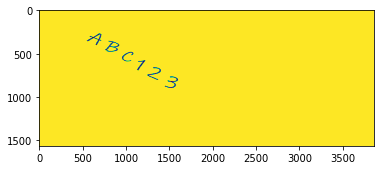

In [214]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
#image = cv2.imread('img/example.png')
#image = cv2.imread('img/img3.jpg')
#image = cv2.imread('img/img2.jpg')
image = cv2.imread('img/img8.png')
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)

#grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

[6017615.   27245.]


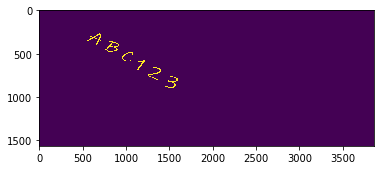

In [215]:
#binary
#ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
#thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#negative
hist = cv2.calcHist([thresh], [0], None, [2], [0,256]).ravel()
print(hist)
if (hist[0]<hist[1]):
    thresh = cv2.bitwise_not(thresh)
    print("negative")
    
plt.imshow(thresh)

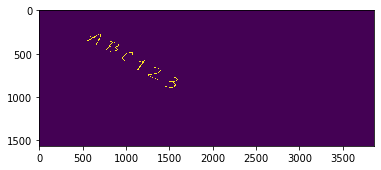

In [216]:
#erosion TODO not used
kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(thresh, kernel, iterations=1)

plt.imshow(img_erosion)

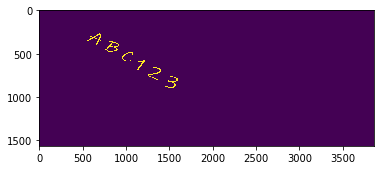

In [217]:
#dilation
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)

plt.imshow(img_dilation)

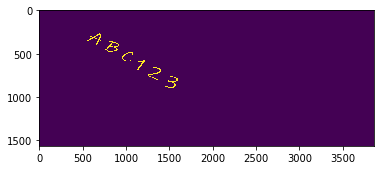

In [218]:
#adding GaussianBlur
gsblur = cv2.GaussianBlur(img_dilation,(5,5), 0)

gsblur = img_dilation
plt.imshow(gsblur)

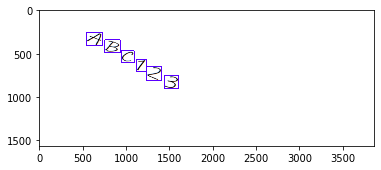

In [219]:
#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp)

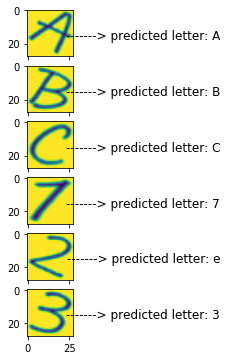

Predicted String: ABC7e3


In [220]:
import sys
m = list()
pchl = list()
pcw = list()

for i, ctr in enumerate(sorted_ctrs):
    try:
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        # Getting ROI
        roi = image[y-10:y+h+10, x-10:x+w+10]
        roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
        roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

        roi = np.array(roi)
        t = np.copy(roi)
        t = t / 255.0
        t = 1-t
        t = t.reshape(1,784)
        m.append(roi)
        pred = model.predict_classes(t)
        pchl.append(pred)
    except:
        print("Unexpected error:", sys.exc_info()[0])

    
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))

if (len(pchl)<=1):
    axs = [axs]

for i in range(len(pchl)):
    # print (pchl[i][0])
    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)


